# Tutorial 2 : Difference between Zn- Mg Alluminium Alloy and Si Alluminium Alloy

# Importing the Useful librararies. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from peakutils import indexes
from  scipy.signal import find_peaks as fp

from bokeh.plotting import figure , show

from bokeh.io import output_notebook
from bokeh.models import LabelSet

output_notebook()

Loading BokehJS ...

# Lets Import csv files for Zn-Mg Alluminium Alloy (Alloy 7022)


In [3]:
Alloy_7022 = pd.read_csv(r'7022.csv', skiprows=0)
Alloy_7022['Wavelength'] = Alloy_7022['Wavelength'].str.strip()
Alloy_7022 = Alloy_7022.filter(['Wavelength','Intensity'],axis=1)
print(Alloy_7022)

     Wavelength    Intensity
0           200  390000000.0
1           201  511000000.0
2           202  607000000.0
3         203.1  661000000.0
4         204.1  655000000.0
...         ...          ...
1760     1995.9         60.0
1761     1996.9         58.0
1762       1998         55.8
1763       1999         53.8
1764       2000         51.8

[1765 rows x 2 columns]


# Lets Import csv files for Si Alluminium Alloy (Alloy 4043)


In [4]:
Alloy_4043 = pd.read_csv(r'4043.csv', skiprows=0)
Alloy_4043['Wavelength'] = Alloy_4043['Wavelength'].str.strip()
Alloy_4043 = Alloy_4043.filter(['Wavelength','Intensity'],axis=1)
print(Alloy_4043)

     Wavelength   Intensity
0           200  12400000.0
1         200.9  16100000.0
2         201.9  19500000.0
3         202.8  21500000.0
4         203.8  22200000.0
...         ...         ...
1893     1985.8      1730.0
1894     1986.8      1690.0
1895     1987.7      1640.0
1896     1988.7      1600.0
1897     1989.6      1560.0

[1898 rows x 2 columns]


# Let's plot the two spectra and see how they look like

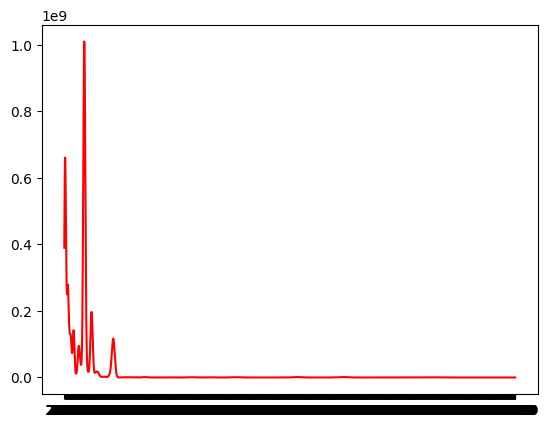

In [5]:
plt.plot(Alloy_7022.Wavelength , Alloy_7022.Intensity , color = 'red')
plt.show()

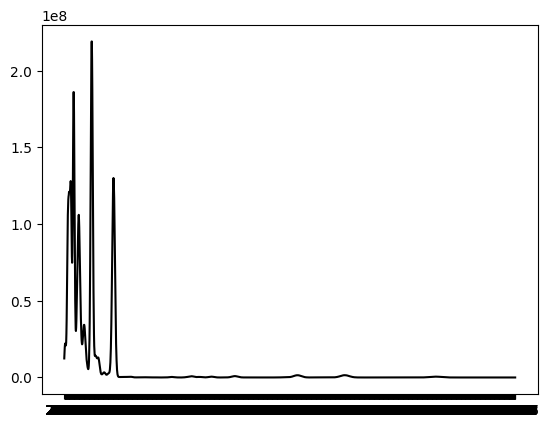

In [6]:
plt.plot(Alloy_4043.Wavelength , Alloy_4043.Intensity , color = 'black')
plt.show()

# In Simple means , what we want to exactly do is , we want to see , which are disimlarities between two plot's , so that we can take them into consideration and then use it for distinguishing between Alloy 4043 and Alloy 7022

Algo:- 

1:- Get Peaks for Alloy 7022 , from that deduce wavelength
2:- Get Peaks for Alloy 4043 , from that deduce wavelength
3:- Compare the two wavelengths , and notice the disimilarities

# Getting Peak for Alloy 7022 [Using Peak Utils]

In [7]:
minimum_distance_7022 = 0  #Since , the Spectral Resolution of the Handheld LIBS Device is much smaller , We can keep this parameter as 0
threshold_7022 = 0 #looking for a value above 0.5% , so that Noise and  Peak with very low Intensities can be ignored 

Reference_Peak_7022 = indexes(Alloy_7022.Intensity , min_dist=minimum_distance_7022 , thres=threshold_7022) 
Reference_Peak_7022 #Return the indices in the form of the list

array([   3,   14,   36,   57,   78,  107,  127,  155,  192,  243,  312,
        349,  421,  494,  525,  572,  663,  711,  792,  907,  979, 1091,
       1182, 1268, 1351, 1445, 1642, 1726])

# Getting Peak for Alloy 4043 [Using Peak Utils]

In [8]:
minimum_distance_4043 = 0  #Since , the Spectral Resolution of the Handheld LIBS Device is much smaller , We can keep this parameter as 0
threshold_4043 = 0 #looking for a value above 0.5% , so that Noise and  Peak with very low Intensities can be ignored 

Reference_Peak_4043 = indexes(Alloy_4043.Intensity, min_dist=minimum_distance_4043 , thres=threshold_4043) 
Reference_Peak_4043 #Return the indices in the form of the list

array([   4,   27,   39,   61,   83,  115,  131,  142,  168,  207,  245,
        279,  321,  337,  381,  451,  535,  568,  619,  717,  774,  857,
        981, 1062, 1180, 1562, 1775, 1869])

# From the Returned Indices , Let's track down the Wavelength and Intensities for the detected Peaks

In [9]:
Selected_Peak_7022 = Alloy_7022.iloc[Reference_Peak_7022] #from the indices , lets try to find the Wavelength and Spectra. 
Selected_Peak_7022

,Wavelength,Intensity
3,203.1,6.610000e+08
14,214.3,2.790000e+08
36,236.7,1.420000e+08
57,258.2,9.520000e+07
78,279.6,1.010000e+09
107,309.2,1.970000e+08
127,329.6,1.790000e+07
155,358.2,2.700000e+06
192,395.9,1.170000e+08
243,448,8.490000e+05


In [10]:
Selected_Peak_4043 = Alloy_4043.iloc[Reference_Peak_4043] #from the indices , lets try to find the Wavelength and Spectra. 
Selected_Peak_4043

,Wavelength,Intensity
4,203.8,22200000.0
27,225.5,128000000.0
39,236.8,186000000.0
61,257.5,106000000.0
83,278.3,34300000.0
115,308.5,219000000.0
131,323.6,14200000.0
142,334,13000000.0
168,358.5,3340000.0
207,395.3,130000000.0


# To compare the wavelengths of two Peaks , We need to prepare the two list first 
# LIST 7022 WAVELENGTH

In [11]:
Selected_Peak_7022_Wavelength = []

for iteam in Selected_Peak_7022.Wavelength:
    iteam = float(iteam)
    Selected_Peak_7022_Wavelength.append(iteam)

print(Selected_Peak_7022_Wavelength)
len(Selected_Peak_7022_Wavelength)     

[203.1, 214.3, 236.7, 258.2, 279.6, 309.2, 329.6, 358.2, 395.9, 448.0, 518.4, 556.1, 629.6, 704.1, 735.7, 783.7, 876.5, 925.5, 1008.2, 1125.5, 1199.0, 1313.3, 1406.1, 1493.9, 1578.6, 1674.5, 1875.5, 1961.2]


28

In [12]:
Selected_Peak_4043_Wavelength = []

for iteam in Selected_Peak_4043.Wavelength:
    iteam = float(iteam)
    Selected_Peak_4043_Wavelength.append(iteam)

print(Selected_Peak_4043_Wavelength)
len(Selected_Peak_4043_Wavelength)

[203.8, 225.5, 236.8, 257.5, 278.3, 308.5, 323.6, 334.0, 358.5, 395.3, 431.1, 463.2, 502.8, 517.9, 559.4, 625.5, 704.7, 735.8, 784.0, 876.4, 930.2, 1008.5, 1125.5, 1201.9, 1313.2, 1673.6, 1874.5, 1963.2]


28

# LOGIC FOR FINDING THE COMMON ELEMENTS

# Because the Spectral resolution is 1 nm.

In [13]:
Common_Element_4043 = []
Common_Element_7022 = []
for iteam in Selected_Peak_4043_Wavelength:
    for element in Selected_Peak_7022_Wavelength:
         if (abs( iteam - element)) <= 1: #absolute because , 1nm can be , to its keft and also can be to its width
            Common_Element_4043.append(iteam)
            Common_Element_7022.append(element)

print(Common_Element_4043)
print(Common_Element_7022)

[203.8, 236.8, 257.5, 308.5, 358.5, 395.3, 517.9, 704.7, 735.8, 784.0, 876.4, 1008.5, 1125.5, 1313.2, 1673.6, 1874.5]
[203.1, 236.7, 258.2, 309.2, 358.2, 395.9, 518.4, 704.1, 735.7, 783.7, 876.5, 1008.2, 1125.5, 1313.3, 1674.5, 1875.5]


# To Get the distant element , so it can be used for comparison between two peaks


In [14]:
set1 = set ( Selected_Peak_4043_Wavelength)
set2 = set (Common_Element_4043)

set3 = set (Selected_Peak_7022_Wavelength)
set4 = set (Common_Element_7022)

Distant_Peak_4043_Wavelength = list(set1.symmetric_difference(set2))     
Distant_Peak_7022_Wavelength = list(set3.symmetric_difference(set4))     

print(Distant_Peak_4043_Wavelength)
print(Distant_Peak_7022_Wavelength)

[323.6, 334.0, 463.2, 278.3, 225.5, 930.2, 1963.2, 431.1, 559.4, 1201.9, 625.5, 502.8]
[448.0, 329.6, 1493.9, 214.3, 279.6, 925.5, 1961.2, 1578.6, 556.1, 1199.0, 629.6, 1406.1]
